In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the CSV file into a DataFrame with tab as a delimiter
df = pd.read_csv('scores_keyword_vector.csv')

# Display the first few rows to ensure it's loaded correctly
df.head()


In [ ]:
import numpy as np

# Function to calculate Precision@k
def precision_at_k(scores, k=5):
    # Convert scores to a NumPy array and replace NaN with 0
    scores = np.asarray(scores)[:k]
    scores = np.nan_to_num(scores, nan=0)  # Replace N/A (nan) with 0
    relevant_scores = scores[(scores == 2) | (scores == 3)]
    return len(relevant_scores) / k

# Function to calculate DCG@k
def dcg_at_k(scores, k=5):
    # Convert scores to a NumPy array and replace NaN with 0
    scores = np.asfarray(scores)[:k]
    scores = np.nan_to_num(scores, nan=0)  # Replace N/A (nan) with 0
    if scores.size:
        return np.sum(scores / np.log2(np.arange(2, scores.size + 2)))
    return 0.0

# Function to calculate NDCG@k
def ndcg_at_k(scores, k=5):
    # Convert scores to a NumPy array and replace NaN with 0
    scores = np.nan_to_num(scores, nan=0)  # Replace N/A (nan) with 0
    dcg_max = dcg_at_k(sorted(scores, reverse=True), k)
    if not dcg_max:
        return 0.0
    return dcg_at_k(scores, k) / dcg_max

# Function to calculate MRR (considering all ranks)
def mean_reciprocal_rank(scores):
    # Convert scores to a NumPy array and replace NaN with 0
    scores = np.asarray(scores)
    scores = np.nan_to_num(scores, nan=0)  # Replace N/A (nan) with 0
    for i, score in enumerate(scores, start=1):
        if score == 3:
            return 1 / i
    return 0


In [ ]:
# Initialize lists to store results
precision_scores = []
mrr_scores = []
dcg_scores = []
ndcg_scores = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Extract relevance scores for the current query (considering top 5 for Precision, DCG, NDCG)
    # Directly extract scores by filtering column names that contain 'Score'
    all_scores = [row[col] for col in df.columns if 'Score' in col]

    top_5_scores = all_scores[:5]
    
    # Calculate metrics
    precision = precision_at_k(top_5_scores, k=5)
    mrr = mean_reciprocal_rank(all_scores)  # Consider all ranks for MRR
    dcg = dcg_at_k(top_5_scores, k=5)
    ndcg = ndcg_at_k(top_5_scores, k=5)
    
    # Append to the lists
    precision_scores.append(precision)
    mrr_scores.append(mrr)
    dcg_scores.append(dcg)
    ndcg_scores.append(ndcg)

# Add the metrics as new columns in the DataFrame
df['Precision@5'] = precision_scores
df['MRR'] = mrr_scores
df['DCG@5'] = dcg_scores
df['NDCG@5'] = ndcg_scores

# Display the DataFrame with the new columns
df.head()


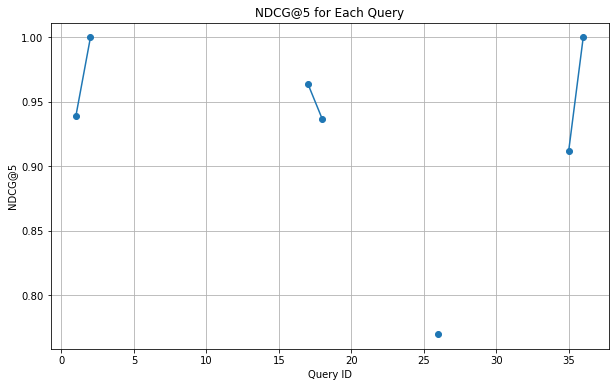

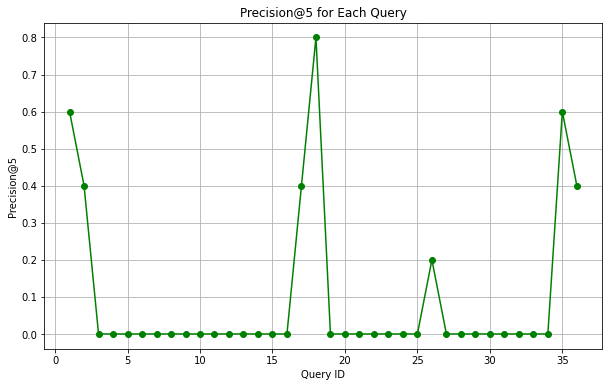

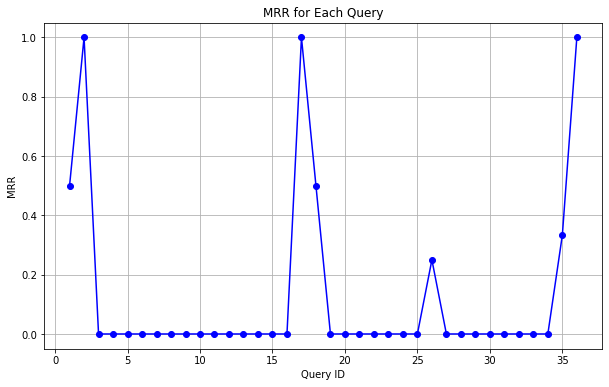

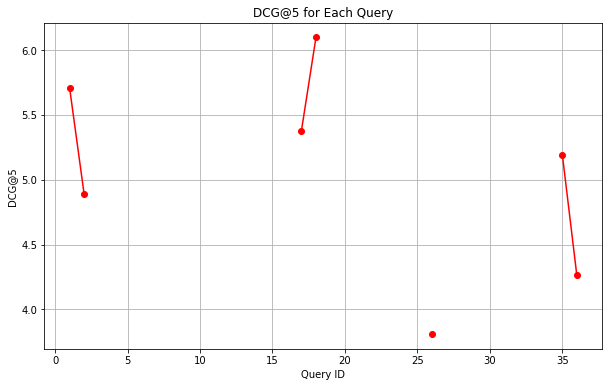

In [5]:
# Plot NDCG@5 scores
plt.figure(figsize=(10, 6))
plt.plot(df['Query ID'], df['NDCG@5'], marker='o')
plt.title('NDCG@5 for Each Query')
plt.xlabel('Query ID')
plt.ylabel('NDCG@5')
plt.grid(True)
plt.show()

# Plot Precision@5 scores
plt.figure(figsize=(10, 6))
plt.plot(df['Query ID'], df['Precision@5'], marker='o', color='green')
plt.title('Precision@5 for Each Query')
plt.xlabel('Query ID')
plt.ylabel('Precision@5')
plt.grid(True)
plt.show()

# Plot MRR scores
plt.figure(figsize=(10, 6))
plt.plot(df['Query ID'], df['MRR'], marker='o', color='blue')
plt.title('MRR for Each Query')
plt.xlabel('Query ID')
plt.ylabel('MRR')
plt.grid(True)
plt.show()

# Plot DCG@5 scores
plt.figure(figsize=(10, 6))
plt.plot(df['Query ID'], df['DCG@5'], marker='o', color='red')
plt.title('DCG@5 for Each Query')
plt.xlabel('Query ID')
plt.ylabel('DCG@5')
plt.grid(True)
plt.show()


In [8]:
# Calculate the average of each metric
avg_precision = df['Precision@5'].mean()
avg_mrr = df['MRR'].mean()
avg_dcg = df['DCG@5'].mean()
avg_ndcg = df['NDCG@5'].mean()

# Create a DataFrame with the average values
average_metrics = pd.DataFrame({
    'Query ID': ['Average'],
    'Query Text': ['N/A'],  # Adjust based on your DataFrame columns
    'Precision@5': [avg_precision],
    'MRR': [avg_mrr],
    'DCG@5': [avg_dcg],
    'NDCG@5': [avg_ndcg]
})

# Append the average metrics as a new row to the DataFrame using pd.concat()
df = pd.concat([df, average_metrics], ignore_index=True)

# Display the DataFrame with the new averages row
df.tail()


,Query ID,Query Text,Answer Chapter,Note,Result 1,Score 1,Result 2,Score 2,Result 3,Score 3,...,Result 8,Score 8,Result 9,Score 9,Result 10,Score 10,Precision@5,MRR,DCG@5,NDCG@5
32,33,dynamically allocation for data structure,", chapter 12.2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
33,34,passing head by value,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
34,35,selction sort,14.2,NaN,14.4,2.0,14.0,2.0,14.2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,0.333333,5.192536,0.912166
35,36,set up vs code,Set Up Visual Studio Code,"document 5 results if top result is in, or kee...",Set Up Visual Studio Code,3.0,1.3,2.0,8.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,1.000000,4.261860,1.000000
36,Average,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.094444,0.127315,5.049089,0.931720


In [9]:
# Save the updated DataFrame to a CSV file
df.to_csv('results_keyword_semantic-search.csv', index=False)

# Confirmation message
print("Updated DataFrame with averages saved to 'results_keyword_semantic-search.csv'.")


Updated DataFrame with averages saved to 'results_keyword_semantic-search.csv'.
